In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import joblib
%matplotlib inline

## 0. EDA

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# 数据类型
train.shape

(1460, 81)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
# 测试集的类形
test.shape

(1459, 80)

In [9]:
# ID 数据不必要, 对预测结果不产生影响
train_ID = train["Id"]
test_ID = test["Id"]

In [10]:
train.SalePrice.describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# 删除Id列特征
train.drop(columns="Id", inplace=True)
test.drop(columns="Id", inplace=True)

## 1.数据处理

### 分析特征与目标之间的关系

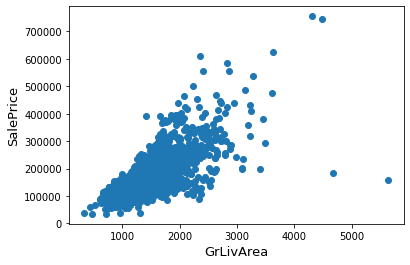

In [12]:
fix, ax = plt.subplots()
ax.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.show()

In [13]:
#　删除异常值
train.drop(train[(train.GrLivArea>4000)&(train.SalePrice<300000)].index, inplace=True)

结论：右下角的数据出现了两个异常值，也即离群点，偏离数据分布趋势，可以删除

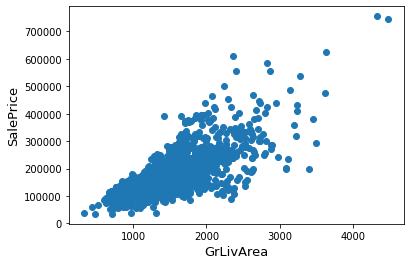

In [14]:
#  删除离群点之后整体呈现线性分布
fix, ax = plt.subplots()
ax.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.show()

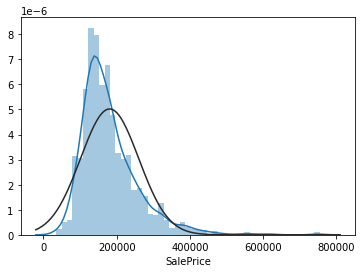

In [15]:
# 处理目标变量
sns.distplot(train.SalePrice, fit=norm)

结论：房屋价格呈现右偏（均值大于中位数）

In [16]:
## 线性数据喜欢正态分布，装换目标变量为正态（log）
train.SalePrice = np.log(train.SalePrice)

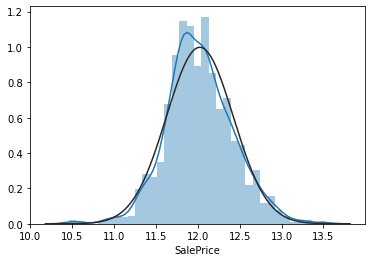

In [17]:
sns.distplot(train.SalePrice, fit=norm)

结论：此时的数据呈现了正态分布形式，有助于回归模型的处理。

### 合并数据

In [18]:
y_train = train.SalePrice.values
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(columns="SalePrice", inplace=True)

### 缺失值

In [19]:
all_data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [20]:
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([Total, percent], axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
...,...,...
1stFlrSF,0,0.000000
CentralAir,0,0.000000
Heating,0,0.000000
Foundation,0,0.000000


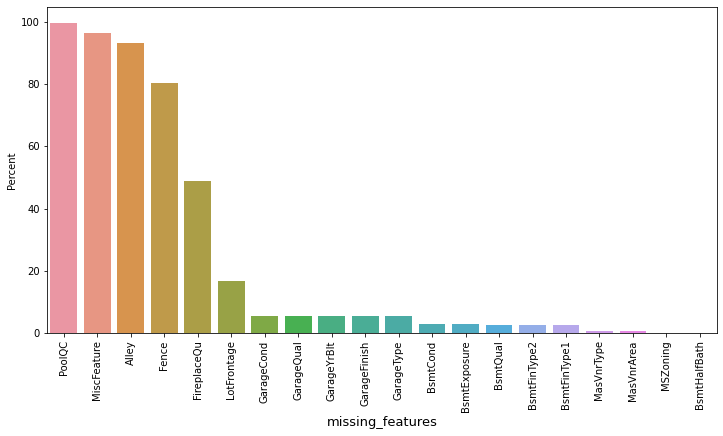

In [21]:
## 可视化缺失值
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=missing_data[:20].index, y=missing_data.Percent[:20])
plt.xticks(rotation=90)
plt.xlabel("missing_features", fontsize=13)
plt.show()

#### 删除缺失空间比较大的数据

In [22]:
all_data.drop(missing_data[missing_data.Total>1].index, 1).isnull().sum()

MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       1
GarageArea       1
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold      

结论：有一部分的数据的缺失值较大，高达90%以上，对于这些特征，可以删除，因为数据确实较大，对于建模没有影响。

#### 填补缺失值

In [23]:
miss_index = all_data[missing_data[missing_data.Total>0].index]
miss_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        9 non-null      object 
 1   MiscFeature   105 non-null    object 
 2   Alley         198 non-null    object 
 3   Fence         571 non-null    object 
 4   FireplaceQu   1497 non-null   object 
 5   LotFrontage   2431 non-null   float64
 6   GarageCond    2758 non-null   object 
 7   GarageQual    2758 non-null   object 
 8   GarageYrBlt   2758 non-null   float64
 9   GarageFinish  2758 non-null   object 
 10  GarageType    2760 non-null   object 
 11  BsmtCond      2835 non-null   object 
 12  BsmtExposure  2835 non-null   object 
 13  BsmtQual      2836 non-null   object 
 14  BsmtFinType2  2837 non-null   object 
 15  BsmtFinType1  2838 non-null   object 
 16  MasVnrType    2893 non-null   object 
 17  MasVnrArea    2894 non-null   float64
 18  MSZoning      2913 non-null 

In [24]:
#  通过观察和结合实际情况可得，缺失值较大的特征，可能本身房屋不具有的性质，例如家中可能没有围栏和游泳池
#  ，所以可以使用空值进行填补
for feature in missing_data.index[:5]:
    all_data[feature] = all_data[feature].fillna("None")

In [25]:
all_data.PoolQC.isnull().sum()

0

In [26]:
# lotFronyage连接物业的街道线，城市范围内的物理位置,把邻居分组之后进行组内均值填充
all_data.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [27]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [28]:
all_data.LotFrontage.isnull().sum()

0

In [29]:
## 对于Garage*的缺失,需要使用空值来进行填补
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd',
       'BsmtUnfSF', 'TotalBsmtSF', 'Exterior1st', 'SaleType', 'Electrical',
       'KitchenQual', 'GarageArea', 'GarageCars', 'OverallQual', 'OverallCond',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'RoofMatl', 'HouseStyle', 'RoofStyle', 'YearRemodAdd', 'YearBuilt',
       'SaleCondition', 'HeatingQC', 'ExterQual', 'ExterCond', 'YrSold',
       'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
       'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'PavedDrive',
       'Fireplaces', '

In [30]:
Total = all_data.isnull().sum().sort_values(ascending=False)
Percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([Total, Percent], axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
GarageCond,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageFinish,159,5.450806
GarageType,157,5.382242
...,...,...
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
CentralAir,0,0.000000


#### 车库特征填补（离散：None 连续：０）

In [31]:
all_data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [33]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#### 地下室特征填补（离散：None 连续：０）

In [34]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [35]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#### 其他特征填补

In [36]:
Total = all_data.isnull().sum().sort_values(ascending=False)
Percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([Total, Percent], axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
MasVnrType,24,0.822763
MasVnrArea,23,0.788481
MSZoning,4,0.137127
Functional,2,0.068564
Utilities,2,0.068564
...,...,...
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
FireplaceQu,0,0.000000
GarageType,0,0.000000


In [37]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [38]:
all_data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [39]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [40]:
all_data = all_data.drop(['Utilities'], axis=1)

In [41]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [42]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [43]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [44]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [45]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [46]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [47]:
# 检查缺失值是否填补完成

Total = all_data.isnull().sum().sort_values(ascending=False)
Percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([Total, Percent], axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
SaleCondition,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
...,...,...
TotRmsAbvGrd,0,0.0
Functional,0,0.0
Fireplaces,0,0.0
FireplaceQu,0,0.0


### 转换数据类型

#### 连续性分类转变为object

In [48]:
all_data.MSSubClass.describe()

count    2917.000000
mean       57.135756
std        42.532140
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [49]:
# 装换数字型变量为分类型变量
all_data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150])

In [50]:
all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)

In [51]:
all_data.MSSubClass.unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40', '150'], dtype=object)

In [52]:
## 总体状态额定值
all_data["OverallCond"] = all_data["OverallCond"].astype(str)

In [53]:
all_data.OverallCond.unique()

array(['5', '8', '6', '7', '4', '2', '3', '9', '1'], dtype=object)

In [54]:
## 修建年月
all_data.YrSold = all_data.YrSold.astype(str)
all_data.MoSold = all_data.MoSold.astype(str)

In [55]:
all_data.MoSold.unique(), all_data.YrSold.unique()

(array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
       dtype=object),
 array(['2008', '2007', '2006', '2009', '2010'], dtype=object))

In [56]:
all_data.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### 数据编码

In [57]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder()
    lbl = lbl.fit(all_data[col])
    all_data[col] = lbl.transform(all_data[col])

In [58]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [59]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,4,2,WD,Normal,2566.0
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,3,4,None,0,7,1,WD,Normal,2524.0
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,3,4,None,0,11,2,WD,Normal,2706.0
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,3,4,None,0,4,0,WD,Abnorml,2473.0
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,3,4,None,0,3,2,WD,Normal,3343.0


In [60]:
## 数值性特征的偏度
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF'],
      dtype='object')

In [61]:
## 检查数据的偏度
skew_fea = pd.DataFrame(all_data[numeric_feats].apply(lambda x:skew(x.dropna()
                                                        )).sort_values(ascending=False))

In [62]:
skew_fea.rename(columns={0:"Skew"}, inplace=True)

In [63]:
skew_fea

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


boxcox目的:  
1. boxcox是将数据分布正态化，使其更加符合后续对数据分布的假设。
2. boxcox可以降低skewness值，达到接近正态分布的目标。

In [64]:
skewness = skew_fea[abs(skew_fea) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewness.index
skewed_features

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'GrLivArea', 'TotalSF',
       'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'HeatingQC',
       'FireplaceQu', 'BedroomAbvGr', 'GarageArea', 'OverallQual', 'FullBath',
       'MSSubClass', 'YrSold', 'BsmtFinType1', 'GarageCars', 'YearRemodAdd',
       'BsmtQual', 'YearBuilt', 'GarageFinish', 'LotShape', 'MoSold', 'Alley',
       'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence', 'ExterCond',
       'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual', 'CentralAir',
       'GarageCond', 'GarageYrBlt', 'Functional', 'Street', 'PoolQC'],
      dtype='object')

In [65]:
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [66]:
## 装换数据为哑变量
all_data = pd.get_dummies(all_data)

In [4]:
train = all_data[:len(train)]
test = all_data[len(train):]
train.to_csv("data/pre_train.csv")
test.to_csv("data/pre_test.csv")
pd.DataFrame(y_train).to_csv("data/y_train.csv")

## 建模

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import xgboost as xgb
from time import time
import datetime

### 读取处理好数据

In [6]:
train = pd.read_csv("./data/pre_train.csv", index_col=0)
test = pd.read_csv("./data/pre_test.csv", index_col=0)
y_train = pd.read_csv('./data/y_train.csv',index_col=0)
y_train = y_train.values.ravel()  # 预测标签为一维数值

### 自定义均方根误差

In [70]:
def rmse(model, x, y):
    """定义均方根误差"""
    
    rmse = np.sqrt(-cross_val_score(model, x
                                    , y
                                    , scoring="neg_mean_squared_error"
                                    , cv=5))
    return rmse

In [71]:
LR = LinearRegression()
ridge = Ridge()
lasso = Lasso()
svr = SVR()
rf = RF()
dtr = DecisionTreeRegressor()
models = [LR, ridge, lasso, svr, rf, dtr]
names = ["LR", "Lasso", "Ridge", "SVR", "RF", "DtreeR"]
for name, model in zip(names, models):
    score = rmse(model, train, y_train)
    print("{}: mean: {:.6f}, std: {:.4f}".format(name
                      , score.mean()
                      , score.std()
                     ))

LR: mean: 139173342.470643, std: 154743936.8679
Lasso: mean: 0.119083, std: 0.0101
Ridge: mean: 0.399471, std: 0.0158
SVR: mean: 0.143315, std: 0.0057
RF: mean: 0.138800, std: 0.0029
DtreeR: mean: 0.201168, std: 0.0141


### 网格搜索进行调参

In [72]:
class GridSearch:
    """回归模型网格搜索"""
    
    def __init__(self, model):
        self.model = model
    
    def grid_get(self, X, y, param_grid):
        """参数搜索"""
        grid_search = GridSearchCV(self.model
                                   , param_grid =param_grid, scoring="neg_mean_squared_error"
                                   ,cv=5
                                  )
        grid_search.fit(X, y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        print(pd.DataFrame(grid_search.cv_results_)[["params", "mean_test_score", "std_test_score"]])

### 岭回归模型

#### 网格搜素

In [73]:
ridge = Ridge()
param_gird = {"alpha":np.arange(1, 11, 1)}
t0 = time()
GridSearch(ridge).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'alpha': 9} 0.11596369356531004
          params  mean_test_score  std_test_score
0   {'alpha': 1}        -0.014283        0.002476
1   {'alpha': 2}        -0.013906        0.002303
2   {'alpha': 3}        -0.013708        0.002187
3   {'alpha': 4}        -0.013593        0.002102
4   {'alpha': 5}        -0.013523        0.002036
5   {'alpha': 6}        -0.013481        0.001983
6   {'alpha': 7}        -0.013458        0.001938
7   {'alpha': 8}        -0.013448        0.001900
8   {'alpha': 9}        -0.013448        0.001866
9  {'alpha': 10}        -0.013455        0.001837
处理时间： 00:00:649041


In [74]:
ridge = Ridge(alpha=9)
ridge.fit(train, y_train)

Ridge(alpha=9)

#### RidgeCV 

In [75]:
ridgcv = RidgeCV(alphas=(1, 10, 1), scoring="neg_mean_squared_error", store_cv_values=False)
ridgcv.fit(train, y_train)
ridgcv.alpha_

10

In [76]:
ridgcv.score(train, y_train)

0.9365675800246268

In [77]:
predict = ridgcv.predict(test)

### Lasso模型
lasso无法解决精确相关性

#### 网格搜索

In [78]:
lasso = Lasso()
param_gird = {"alpha":np.arange(0.00043, 0.0005, 0.00001)}
t0 = time()
GridSearch(lasso).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'alpha': 0.00043} 0.11356475521449062
                              params  mean_test_score  std_test_score
0                 {'alpha': 0.00043}        -0.012897        0.001809
1                 {'alpha': 0.00044}        -0.012898        0.001806
2  {'alpha': 0.00045000000000000004}        -0.012900        0.001803
3  {'alpha': 0.00046000000000000007}        -0.012904        0.001800
4   {'alpha': 0.0004700000000000001}        -0.012909        0.001798
5   {'alpha': 0.0004800000000000001}        -0.012914        0.001795
6   {'alpha': 0.0004900000000000002}        -0.012919        0.001793
7   {'alpha': 0.0005000000000000002}        -0.012924        0.001790
处理时间： 00:02:327913


#### lassoCV

In [79]:
lassocv = LassoCV(eps=0.0001, n_alphas=200, normalize=True)
lassocv.fit(train,y_train)
lassocv.alpha_

0.00011631854612913174

In [80]:
lassocv.score(train, y_train)

0.9329812862590999

In [81]:
predict = lassocv.predict(test)

### SVR模型

In [82]:
svr = SVR()
param_gird = {"kernel":["linear", "poly", "rbf", "sigmoid"]}
t0 = time()
GridSearch(svr).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'kernel': 'linear'} 0.1259393744897887
                  params  mean_test_score  std_test_score
0   {'kernel': 'linear'}        -0.015861        0.002488
1     {'kernel': 'poly'}        -0.018048        0.001575
2      {'kernel': 'rbf'}        -0.020572        0.001644
3  {'kernel': 'sigmoid'}        -0.213117        0.030916
处理时间： 00:50:899414


In [83]:
svr = SVR()
param_gird = {"kernel":["linear"]}
t0 = time()
GridSearch(svr).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'kernel': 'linear'} 0.1259393744897887
                 params  mean_test_score  std_test_score
0  {'kernel': 'linear'}        -0.015861        0.002488
处理时间： 00:45:910471


### 随机森林回归

In [86]:
rf = RF()
param_gird = {"n_estimators":[400]}
GridSearch(rf).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'n_estimators': 400} 0.13763290226318367
                  params  mean_test_score  std_test_score
0  {'n_estimators': 400}        -0.018943        0.000944
处理时间： 09:16:000502


### 决策树的回归

In [87]:
dtr = DecisionTreeRegressor()
param_gird = {"max_depth":[5]}
GridSearch(dtr).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'max_depth': 5} 0.1884811302346338
             params  mean_test_score  std_test_score
0  {'max_depth': 5}        -0.035525        0.003352
处理时间： 09:16:126058


### XGboost模型
0. 确定模型的目标：分类、回归、排序
- obj  
- “reg:linear” —— 线性回归。  
- “reg:logistic”—— 逻辑回归。  
- “binary:logistic”—— 二分类的逻辑回归问题，输出为概率。  
- “binary:logitraw”—— 二分类的逻辑回归问题，输出的结果为wTx。  
- “count:poisson”—— 计数问题的poisson回归，输出结果为poisson分布。在poisson回归中，max_delta_step的缺省值为0.7。(used to safeguard optimization)
- “multi:softmax” –让XGBoost采用softmax目标函数处理多分类问题，同时需要设置参数num_class（类别个数）  
- “multi:softprob” –和softmax一样，但是输出的是ndata * nclass的向量，可以将该向量reshape成ndata行nclass列的矩阵。没行数据表示样本所属于每个类别的概率。  
- “rank:pairwise” –set XGBoost to do ranking task by minimizing the pairwise loss  
1. 首先调节eta和num_round来控制收敛速度和最大建树,两者之间相互制约，需要同时调整参数，故使用网格搜索进行调整。
- eta: xgboost在进行完一次迭代后，会将叶子节点的权重乘上该系数，主要是为了削弱每棵树的影响，让后面有更大的学习空间。实际应用中，一般把eta设置得小一点，然后迭代次数设置得大一点
- num_round: 建立弱分类器数量（也即迭代次数），其数量越大，模型的学习能力就会越强。但是，较大num_round会造成过拟合，且增加到一定程度之后，模型达到上限，不会在增加准确率。
2. gamma或者max_depth控制子树的复杂程度，减低模型复杂度（减少过拟合）
- max_depth: 默认值为６，通过控制输的深度从而控制树模型的复杂程度，来减少过拟合分风险。
- gamma: 树结点分裂的最低要求，能够减低过拟合
3. 调节横向或纵向的数据抽样比例
- subsample: boostrap抽样，让模型变的轻量，有放回抽样，可以减少过拟合。
- colsample_bytree:控制每棵树的特征抽取比例，减少过拟合的风险。
4. 正则化系数：L1: alpha L2: lambda

#### xgboost自带

In [98]:
dfull = xgb.DMatrix(train, y_train)

In [99]:
## 交差验证（分类性的特征）
# 初始的调参结果(全部使用默认值)
param1 = {'verbosity':0 #并非默认
        ,'obj':'reg:linear' #并非默认
          
#         ,"eta":0.01
          
#         ,"gamma":0
#         ,"max_depth":6

#         ,"subsample":1  # 横向抽样
#         ,"colsample_bytree":1  # 纵向抽样
#         ,"colsample_bylevel":1
#         ,"colsample_bynode":1

#         ,"lambda":1  # L2
#         ,"alpha":0  # L1
         }
num_round = 300

In [100]:
print("The time of param１:")
t0 = time()
cvresult = xgb.cv(params=param1, dtrain=dfull, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

# 上一次的调参结果
param2 = {'verbosity':0
        ,'obj':'reg:linear' #并非默认
          
        ,"eta":0.1
          
#         ,"gamma":0.1
        ,"max_depth":2

#         ,"subsample":1  # 横向抽样
#         ,"colsample_bytree":0.5  # 纵向抽样:在建立树时对特征随机采样的比例。
#         ,"colsample_bylevel":1
#         ,"colsample_bynode":1

        ,"lambda":12  # L2
#         ,"alpha":0  # L1
         }

# 现在的调参结果
param3 = {'verbosity':0
        ,'obj':'reg:linear' #并非默认
          
        ,"eta":0.1
          
#         ,"gamma":0
        ,"max_depth":2

#         ,"subsample":1  # 横向抽样
#         ,"colsample_bytree":1  # 纵向抽样
#         ,"colsample_bylevel":1
#         ,"colsample_bynode":1

        ,"lambda":12  # L2
#         ,"alpha":0  # L1
         }

t0 = time()
print("The time of param2:")
cvresult2 = xgb.cv(params=param2, dtrain=dfull, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

print("The time of param3:")
t0 = time()
cvresult3 = xgb.cv(params=param3, dtrain=dfull, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

The time of param１:
00:01:831500
The time of param2:
00:01:437454
The time of param3:
00:01:457000


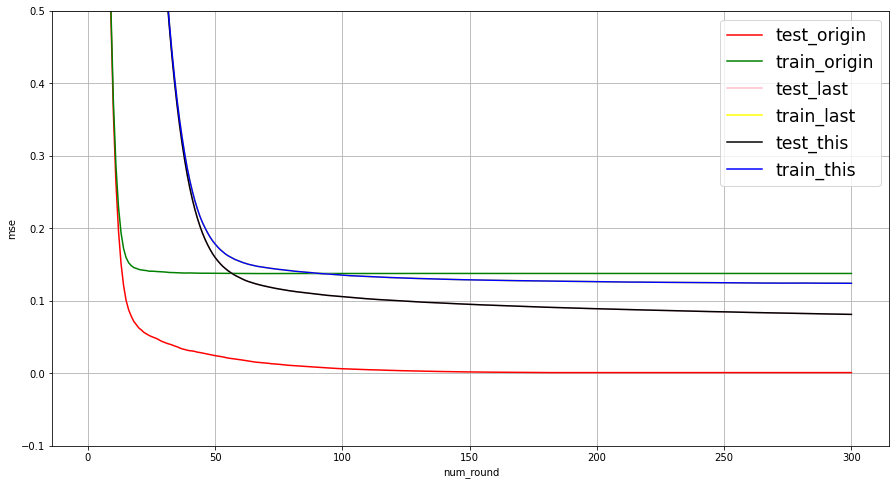

In [101]:
#　调整参数后的效果
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.grid()
end = num_round + 1

ax.plot(range(1, end), cvresult.iloc[:, 0], c="red", label="test_origin")
ax.plot(range(1, end), cvresult.iloc[:, 2], c="green", label="train_origin")

ax.plot(range(1, end), cvresult2.iloc[:, 0], c="pink", label="test_last")
ax.plot(range(1, end), cvresult2.iloc[:, 2], c="yellow", label="train_last")

ax.plot(range(1, end), cvresult3.iloc[:, 0], c="black", label="test_this")
ax.plot(range(1, end), cvresult3.iloc[:, 2], c="blue", label="train_this")

ax.legend(fontsize = "xx-large")
ax.set_ylim(bottom=-0.1, top=0.5)
plt.ylabel("mse")
plt.xlabel("num_round")
plt.savefig("./imgs/cv.png")
plt.show()

In [102]:
xgb_model = xgb.train(param3, dtrain=dfull, num_boost_round=40)

In [103]:
dtest = xgb.DMatrix(test)
predict = xgb_model.predict(dtest)

In [104]:
predict

array([11.52827 , 11.756016, 11.832375, ..., 11.62933 , 11.596333,
       12.119371], dtype=float32)

#### sklearn接口(网格搜索)

In [105]:
# param
xgb_model = xgb.XGBRegressor(learning_rate=0.06
                             , n_estimators=340
                             , max_depth=4
                             , subsample=0.6
                             , colsample_tree=0.5
                             , random_state = 100
                            )
param_gird = {}
t0 = time()
GridSearch(xgb_model).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{} 0.11786483994066725
  params  mean_test_score  std_test_score
0     {}        -0.013892        0.001433
处理时间： 00:02:920879


In [106]:
xgb_model = xgb_model.fit(train, y_train)
predict = xgb_model.predict(test)

#### 2.1 自己调参数

#### 2.1.1 同时调整num_round和learning_rate

In [107]:
# param
xgb_model = xgb.XGBRegressor(
                            )
param_gird = {"learning_rate": np.arange(0.05, 0.1, 0.01)
              , "n_estimators": np.arange(380, 410, 20)
             }
t0 = time()
GridSearch(xgb_model).grid_get(train, y_train, param_gird)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'learning_rate': 0.060000000000000005, 'n_estimators': 380} 0.11924131325152587
                                              params  mean_test_score  \
0       {'learning_rate': 0.05, 'n_estimators': 380}        -0.014882   
1       {'learning_rate': 0.05, 'n_estimators': 400}        -0.014883   
2  {'learning_rate': 0.060000000000000005, 'n_est...        -0.014218   
3  {'learning_rate': 0.060000000000000005, 'n_est...        -0.014224   
4       {'learning_rate': 0.07, 'n_estimators': 380}        -0.014852   
5       {'learning_rate': 0.07, 'n_estimators': 400}        -0.014846   
6  {'learning_rate': 0.08000000000000002, 'n_esti...        -0.014923   
7  {'learning_rate': 0.08000000000000002, 'n_esti...        -0.014923   
8  {'learning_rate': 0.09000000000000001, 'n_esti...        -0.014803   
9  {'learning_rate': 0.09000000000000001, 'n_esti...        -0.014795   

   std_test_score  
0        0.001780  
1        0.001775  
2        0.001578  
3        0.001584  
4        0.0017

#### 2.1.2 调整不同的参数值

最佳参数： 1 
损失值： 0.11488895632255516


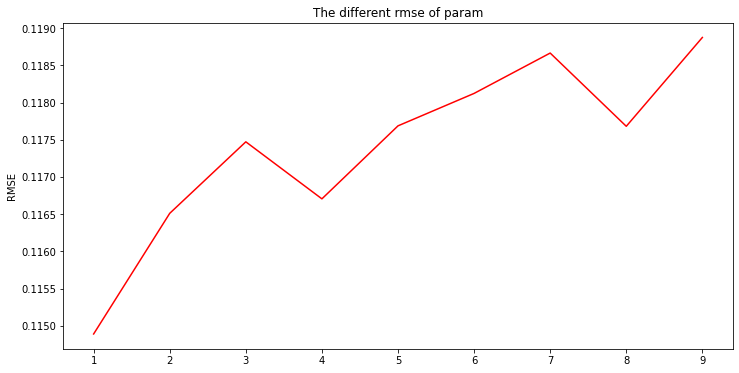

In [108]:
## 调结num_round
axisx = np.arange(1, 10, 1)

rs =  []
for i in axisx:
    xgb_reg = xgb.XGBRegressor(n_estimators=380
                               , learning_rate=0.06
                               , max_depth=3
                               
                               , subsample = 0.6
                               , colsample_bytree = 0.7
                               , reg_lambda = i
                               
                               , random_state=100
                              )
    
    value = cross_val_score(xgb_reg
                    , train
                    , y_train
                    , cv=5
                    , scoring="neg_mean_squared_error").mean()
    
    rs.append(np.sqrt(-value))
    
print("最佳参数：",axisx[rs.index(min(rs))], "\n损失值：", min(rs))
plt.figure(figsize=(12, 6))
plt.plot(axisx, rs, c="red")
plt.ylabel("RMSE")
plt.title("The different rmse of param")
plt.savefig("./imgs/param.png")
plt.show()

In [109]:
xgb_reg = xgb.XGBRegressor(n_estimators=380
                           , learning_rate=0.06
                           , max_depth=3

                           , subsample = 0.6
                           , colsample_bytree = 0.7
                           , reg_lambda = 1

                           , random_state=100
                          )
predict = xgb_reg.fit(train, y_train).predict(test)

#### 保存模型

In [110]:
joblib.dump(xgb_reg, "model/xgb_reg.dat")

['model/xgb_reg.dat']

In [111]:
joblib.load("model/xgb_reg.dat")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=380, n_jobs=0, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### 调参数方向

[当GridSearch遇上XGBoost 一段代码解决调参问题](https://juejin.im/post/5b7669c4f265da281c1fbf96)  
[xgboost参数和调参技巧](https://sthsf.github.io/wiki/Algorithm/EnsembleMethod/EnsembleLearning/xgboost%E5%8F%82%E6%95%B0%E5%92%8C%E8%B0%83%E5%8F%82%E6%8A%80%E5%B7%A7.html)

### LightGBM

In [8]:
X_train,X_val, Y_train, Y_val = train_test_split(train, y_train
                                                 , test_size=0.2
                                                 , random_state=0
                                                )

In [9]:
train = lgb.Dataset(X_train, Y_train)
val = lgb.Dataset(X_val, Y_val)

#### 初始化状态(未调参)

In [10]:
# 参数设定为默认状态
params1 = {
      "boosting_type": "gbdt"
    , "objective": "regression" # 二分类任务
    , "metric": {"rmse"}
    
    , "nthread": 4
    , "device": "gpu"
    , "gpu_device_id": 1
    , "verbose": 1

    , "learning_rate": 0.1
    
    , "max_depth": 5
    , "num_leaves": 31  # 由于lightGBM是leaves_wise生长，官方说法是要小于2^max_depth
    , "subsample": 1.0  # 数据采样
    , "colsample_bytree": 1.0  # 特征采样
    
    , 'reg_alpha': 0.0  # L1
    , 'reg_lambda': 0.0  # L2
}

In [57]:
t0 = time()
cv_result1 = lgb.cv(params=params1, train_set=train
       , nfold=5
       , stratified=False  # 回归任务不支持分层抽样
       , shuffle=True
       , seed=0
      )
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

处理时间： 00:01:532604


#### 调整好的参数状态

In [44]:
num_boost_round = 1000
params2 = {
      "boosting_type": "gbdt"
    , "objective": "regression" # 回归任务
    , "metric": {"rmse"}
    
    , "nthread": 4
    , "device": "gpu"
    , "gpu_device_id": 1
    , "verbose": 1

    , "learning_rate": 0.01
    
    , "max_depth": 5
    , "num_leaves": 31  # 由于lightGBM是leaves_wise生长，官方说法是要小于2^max_depth
    , "subsample": 1.0  # 数据采样
    , "colsample_bytree": 1.0  # 特征采样
    
    , 'reg_alpha': 0.0  # L1
    , 'reg_lambda': 0.0  # L2
}

In [45]:
t0 = time()
cv_result2 = lgb.cv(params=params2, train_set=train
       , num_boost_round=num_boost_round
       , nfold=5
       , stratified=False
       , shuffle=True
       , seed=0
      )
print("参数处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

参数处理时间： 00:08:320164


In [46]:
#  选择最佳的estimators
print("Best_n_estimators: %d\nBest_cv_score: %.4f" 
      % (np.array(list(cv_result2.values())).shape[1],
         min(np.array(list(cv_result2.values()))[0]))
     ) 

Best_n_estimators: 1000
Best_cv_score: 0.1328


#### 正在调参的状态

In [51]:
params3 = {
      "boosting_type": "gbdt"
    , "objective": "regression" # 回归任务
    , "metric": {"rmse"}
    
    , "nthread": 4
    , "device": "gpu"
    , "gpu_device_id": 1
    , "verbose": 1

    , "learning_rate": 0.01
    
    , "max_depth": 3
    , "num_leaves": 7  # 由于lightGBM是leaves_wise生长，官方说法是要小于2^max_depth
    , "subsample": 1.0  # 数据采样
    , "colsample_bytree": 1.0  # 特征采样
    
    , 'reg_alpha': 0.0  # L1
    , 'reg_lambda': 0.0  # L2
}

In [54]:
t0 = time()
cv_result3 = lgb.cv(params=params3, train_set=train
       , num_boost_round=2000
       , nfold=5
       , stratified=False
       , shuffle=True
       , seed=0
      )
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

处理时间： 00:08:277423


#### 可视化指标

#### rmse

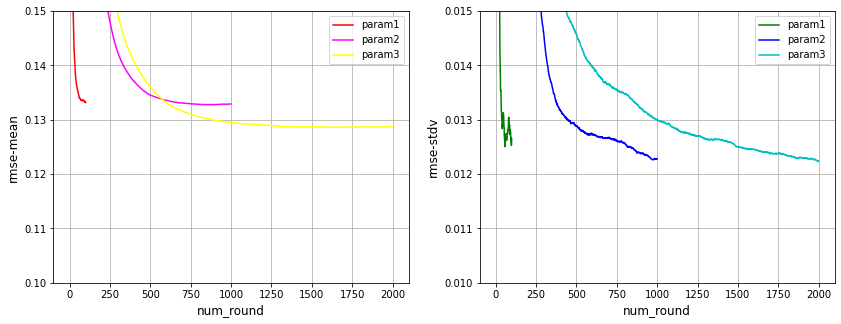

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))

length1 = np.array(list(cv_result1.values())).shape[1]
length2 = np.array(list(cv_result2.values())).shape[1]
length3 = np.array(list(cv_result3.values())).shape[1]

ax[0].plot(range(length1), cv_result1[list(cv_result1.keys())[0]], label="param1", c="red")
ax[1].plot(range(length1), cv_result1[list(cv_result1.keys())[1]], label="param1", c="green")

ax[0].plot(range(length2), cv_result2[list(cv_result2.keys())[0]], label="param2", c="magenta")
ax[1].plot(range(length2), cv_result2[list(cv_result2.keys())[1]], label="param2", c="blue")

ax[0].plot(range(length3), cv_result3[list(cv_result3.keys())[0]], label="param3", c="yellow")
ax[1].plot(range(length3), cv_result3[list(cv_result3.keys())[1]], label="param3", c="c")

ax[0].set_xlabel("num_round", fontsize=12)
ax[1].set_xlabel("num_round", fontsize=12)
ax[0].set_ylabel(list(cv_result1.keys())[0], fontsize=12)
ax[1].set_ylabel(list(cv_result1.keys())[1], fontsize=12)
ax[0].set_ylim((0.1, 0.15))
ax[1].set_ylim((0.010, 0.015))
ax[1].grid()
ax[0].grid()
ax[0].legend()
ax[1].legend()
plt.show()

In [56]:
## 预测
# lgbr = lgb.train(param3, train, num_boost_round=3000)

In [264]:
predict = lgbr.predict(test)

#### sklearn接口

In [272]:
LGBR = lgb.LGBMRegressor(device="gpu", )
param_grid={"learning_rate":[0.01],"n_estimators":np.arange(1000, 1500, 100)}
t0 = time()
GridSearch(LGBR).grid_get(X_train, Y_train, param_grid)
print("处理时间：",datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

{'learning_rate': 0.01, 'n_estimators': 1000} 0.13362794795792926
                                          params  mean_test_score  \
0  {'learning_rate': 0.01, 'n_estimators': 1000}        -0.017856   
1  {'learning_rate': 0.01, 'n_estimators': 1100}        -0.017874   
2  {'learning_rate': 0.01, 'n_estimators': 1200}        -0.017918   
3  {'learning_rate': 0.01, 'n_estimators': 1300}        -0.017939   
4  {'learning_rate': 0.01, 'n_estimators': 1400}        -0.017955   

   std_test_score  
0        0.004321  
1        0.004297  
2        0.004322  
3        0.004345  
4        0.004333  
处理时间： 01:53:695281


### 模型融合(Stacking)

#### 划分数据集

In [ ]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,shuffle=False)

In [ ]:
def get_out_fold(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain, ))
    oof_test = np.zeros((ntest, ))
    # 存放K折结果
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr, y_tr)
        
        # 填充所有的测试结果的值
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
    
    # k折平均
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test.reshape(-1,1)

#### 基学习器

In [ ]:
ridge = Ridge(alpha=9)
lasso = Lasso(alpha=0.00043)
rf = RF(n_estimators=400)
dtr = DecisionTreeRegressor(max_depth=5)
svr = SVR(kernel="linear")

In [ ]:
x_train = train.values
x_test = test.values

In [ ]:
ridge_oof_train, ride_oof_test = get_out_fold(ridge, x_train, y_train, x_test)
lasso_oof_train, lasso_oof_test = get_out_fold(lasso, x_train, y_train, x_test)
rf_oof_train, rf_oof_test = get_out_fold(lasso, x_train, y_train, x_test)
dtr_oof_train, dtr_oof_test = get_out_fold(dtr, x_train, y_train, x_test)
svr_oof_train, svr_oof_test = get_out_fold(svr, x_train, y_train, x_test)

In [ ]:
model_train = np.concatenate((ridge_oof_train, lasso_oof_train, rf_oof_train, dtr_oof_train, svr_oof_train), axis=1)
model_test = np.concatenate((ride_oof_test, lasso_oof_test, rf_oof_test, dtr_oof_test, svr_oof_test), axis=1)

In [ ]:
model_train.shape, model_test.shape

#### 次学习器

In [ ]:
xgb_train = xgb.DMatrix(model_train, y_train)
xgb_test = xgb.DMatrix(model_test)

In [ ]:
## 交差验证（分类性的特征）
# 初始的调参结果(全部使用默认值)
param1 = {'silent':False #并非默认
        ,'obj':'reg:linear' #并非默认
          
#         ,"eta":0.01
          
#         ,"gamma":0
#         ,"max_depth":6

#         ,"subsample":1  # 横向抽样
#         ,"colsample_bytree":1  # 纵向抽样
#         ,"colsample_bylevel":1
#         ,"colsample_bynode":1

#         ,"lambda":1  # L2
#         ,"alpha":0  # L1
         }
num_round = 400

In [ ]:
print("The time of param１:")
t0 = time()
cvresult = xgb.cv(params=param1, dtrain=xgb_train, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

# 上一次的调参结果
param2 = {'silent':False
        ,'obj':'reg:linear' #并非默认
          
        ,"eta":0.05
          
#         ,"gamma":0.1
        ,"max_depth":2
          
#         ,"subsample":1  # 横向抽样
#         ,"colsample_bytree":0.5  # 纵向抽样:在建立树时对特征随机采样的比例。
#         ,"colsample_bylevel":1
#         ,"colsample_bynode":1

#         ,"lambda":12  # L2
#         ,"alpha":0  # L1
         }

# 现在的调参结果
param3 = {'silent':False
        ,'obj':'reg:linear' #并非默认
          
        ,"eta":0.05
          
#         ,"gamma":0
        ,"max_depth":2

#         ,"subsample":1  # 横向抽样
#         ,"colsample_bytree":1  # 纵向抽样
#         ,"colsample_bylevel":1
#         ,"colsample_bynode":1

#         ,"lambda":12  # L2
#         ,"alpha":0  # L1
         }

t0 = time()
print("The time of param2:")
cvresult2 = xgb.cv(params=param2, dtrain=xgb_train, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

print("The time of param3:")
t0 = time()
cvresult3 = xgb.cv(params=param3, dtrain=xgb_train, num_boost_round=num_round)
print(datetime.datetime.fromtimestamp(time()-t0).strftime("%M:%S:%f"))

In [ ]:
#　调整参数后的效果
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.grid()
end = num_round + 1
ax.plot(range(1, end), cvresult.iloc[:, 0], c="red", label="test_origin")
ax.plot(range(1, end), cvresult.iloc[:, 2], c="green", label="train_origin")

ax.plot(range(1, end), cvresult2.iloc[:, 0], c="pink", label="test_last")
ax.plot(range(1, end), cvresult2.iloc[:, 2], c="yellow", label="train_last")

ax.plot(range(1, end), cvresult3.iloc[:, 0], c="black", label="test_this")
ax.plot(range(1, end), cvresult3.iloc[:, 2], c="blue", label="train_this")
ax.legend(fontsize = "xx-large")
ax.set_ylim(bottom=-0.1, top=0.5)
plt.savefig("./imgs/cv.svg")
plt.show()

In [ ]:
xgb_model = xgb.train(params=param3, dtrain=xgb_train, num_boost_round=400)
predict = xgb_model.predict(xgb_test)

#### 模型保存

In [ ]:
joblib.dump(xgb_model, "model/stacking.dat")

## 模型的可解释性
目的：通过对模型的的预测结果进行追本溯源，从而解释模型“为什么？”

In [ ]:
import shap

shap.initjs()
model = joblib.load("model/xgb_reg.dat")

In [ ]:
# 构建解释器
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train)
pd.DataFrame(shap_values, columns=train.columns)

In [ ]:
# 检查模型有关预测结果的重要特征
# shap特征重要性
shap.summary_plot(shap_values, train, plot_type="bar")

结论：可以看出，对于房价的价格的波动起重要性的作用的特征为：总体房屋价格（组合特征），房屋的整体质量，房屋的重塑时间等，这几个特征的变化对最终的有重要作用。

In [ ]:
feature_importance = pd.DataFrame([train.columns, model.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by="Importance", ascending=False).head(10)

In [ ]:
# Shap解释力图（单样本重要特征描述）
# 样本1
shap.force_plot(explainer.expected_value
                , shap_values[1,:]
                , train.iloc[1,:]
                , matplotlib=True
               )

In [ ]:
shap.bar_plot(shap_values[1], train.iloc[1,:])

In [ ]:
shap.waterfall_plot(explainer.expected_value, shap_values[1], feature_names=train.columns.tolist())

In [ ]:
# 样本2
shap.force_plot(explainer.expected_value
                , shap_values[2,:]
                , train.iloc[2,:]
                , matplotlib=True
               )

In [ ]:
shap.bar_plot(shap_values[2], train.iloc[2,:])

In [ ]:
shap.waterfall_plot(explainer.expected_value
                    , shap_values[2]
                    , feature_names=train.columns.tolist()
                   )

结论：通过两个实例样本进行特征重要性的解释，样本的预测价格略低，是由于房屋的整体质量欠缺，而总体额定值较高使其价格增增高的原因。对于样本2的房屋价格高于样本1的原因卡源于房屋整体质量好、居住面积大。

In [ ]:
# shap摘要图
shap.summary_plot(shap_values, train)

结论：从shao摘要图中可以看，越是最新建造的、整体质量高、面积越大房屋，对于最后的预测价格越有影响，这也符合实际情况。

In [ ]:
shap.decision_plot(explainer.expected_value
                   ,shap_values[2]
                   , feature_names=train.columns.tolist())

结论：暂时看不懂

In [ ]:
shap.embedding_plot(ind="TotalSF"
                    , shap_values=shap_values
                    , feature_names=train.columns.tolist()
                   )

In [ ]:
shap.save_html("./imgs/force_plot.html", plot_html=shap.force_plot(explainer.expected_value
                , shap_values[1,:]
                , train.iloc[1,:]
#                 , matplotlib=True
               ))

## Kaggle预测

In [265]:
predict = np.expm1(predict)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict
sub.to_csv('submission.csv',index=False)

## 参考
[stats.boxcox()函数详解](https://blog.csdn.net/The_Time_Runner/article/details/99459905?utm_medium=distribute.pc_relevant.none-task-blog-baidujs-2)  
[模型融合](https://zhuanlan.zhihu.com/p/34904202)  
[峰度（Kurtosis）和偏度（Skewness）](https://blog.csdn.net/jmydream/article/details/8562089?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase)　　
